In [ ]:
import numpy as np
import pandas as pd

from sklearn import svm

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cupcakes vs Muffins.csv')
df.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


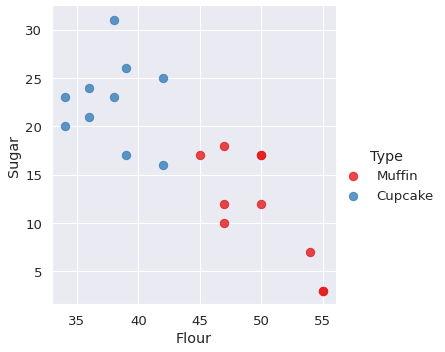

In [ ]:
#plot data
sns.lmplot('Flour', 'Sugar', data=df, hue='Type', palette='Set1', fit_reg=False, scatter_kws={'s': 70} )

In [ ]:
type_label = np.where(df['Type']=='Muffin',0,1)
receipt_feature = df.columns.values[1:].tolist()
receipt_feature

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']

In [ ]:
ingredients = df[['Flour', 'Sugar']].values
ingredients 

array([[55,  3],
       [47, 12],
       [47, 18],
       [45, 17],
       [50, 12],
       [55,  3],
       [54,  7],
       [47, 10],
       [50, 17],
       [50, 17],
       [39, 26],
       [42, 16],
       [34, 20],
       [39, 17],
       [38, 23],
       [42, 25],
       [36, 21],
       [38, 31],
       [36, 24],
       [34, 23]])

In [ ]:
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)

SVC(kernel='linear')

In [ ]:
def muffin_cake(flour, sugar):
  if(model.predict([[flour, sugar]]))==0:
    print('it muffin receipe')
  else:
    print('it cake receipe')

In [ ]:
muffin_cake(50, 35)

it muffin receipe


In [ ]:
cars = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cars.csv')
cars.head()
x = cars[cars[' brand']!=' Honda']
y = cars.drop([' brand'], axis=1)
x1 = x.loc[x[' hp']>75,[' hp', ' year', ' brand']]
x1

,hp,year,brand
0,165,1972,Toyota
2,140,1971,Toyota
3,150,1971,Toyota
5,125,1980,Toyota
6,158,1974,Toyota
...,...,...,...
255,95,1971,Nissan
256,130,1980,Toyota
258,112,1983,Toyota
259,100,1972,Toyota


In [ ]:
X = cars[cars.columns[:-1]]
X = X.replace(np.nan, 0, regex=True)
X[' cubicinches'] = pd.to_numeric(X[' cubicinches'], errors='coerce')
X[' weightlbs'] = pd.to_numeric(X[' weightlbs'], errors='coerce')
X.dtypes

mpg             float64
 cylinders        int64
 cubicinches    float64
 hp               int64
 weightlbs      float64
 time-to-60       int64
 year             int64
dtype: object

In [ ]:
# eliminasi null value
xc = X.groupby([' cylinders', ' year']).agg(count_year =(' year', 'count'))
xc

count_year
 cylinders  year            
3          1974            1
           1978            1
4          1971            5
           1972            7
           1973           10
           1974            9
           1975            7
           1976           10
           1977           10
           1978            8
           1979           10
           1980            7
           1981           15
           1982           13
           1983           14
5          1979            1
           1980            1
           1981            1
6          1971            3
           1972            6
           1974            6
           1975            2
           1976            7
           1977            9
           1978            4
           1979            4
           1980            5
           1981            2
           1982            5
           1983            2
8          1971           15
           1972            2
           1973            6
           1974           19
           1975            3
           1976            5
           1977            7
           1978            5
           1979            6
           1980            8